In [ ]:
import pandas as pd, numpy as np, os, joblib, matplotlib.pyplot as plt, seaborn as sns, json, traceback
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.feature_selection import mutual_info_classif

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")
RANDOM_STATE = 42

In [3]:
# === Paths ===
csv_path = "./INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls"
out_dir = "inx_outputs"
os.makedirs(out_dir, exist_ok=True)

In [4]:
# Make sure xlrd is installed:
# pip install xlrd==1.2.0

## Convert XLS to CSV

xls_path = "./INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls"
csv_path = "./INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv"

df = pd.read_excel(xls_path, engine="xlrd")
df.to_csv(csv_path, index=False)
print("Converted successfully:", csv_path)


Converted successfully: ./INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv


In [5]:
# === Paths ===
csv_path = "./INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv"
out_dir = "inx_outputs"
os.makedirs(out_dir, exist_ok=True)

In [6]:
# === 1. Load ===
df = pd.read_csv(csv_path)
print("Loaded:", csv_path, "shape:", df.shape)
display(df.head())

Loaded: ./INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv shape: (1200, 28)


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [7]:
# === 2. Quick data check ===
print("\nColumns and dtypes:")
display(df.dtypes)
print("\nMissing values per column:")
print(df.isnull().sum().sort_values(ascending=False).head(20))


Columns and dtypes:


EmpNumber                       object
Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager     


Missing values per column:
EmpNumber                       0
Age                             0
Attrition                       0
YearsWithCurrManager            0
YearsSinceLastPromotion         0
ExperienceYearsInCurrentRole    0
ExperienceYearsAtThisCompany    0
EmpWorkLifeBalance              0
TrainingTimesLastYear           0
TotalWorkExperienceInYears      0
EmpRelationshipSatisfaction     0
EmpLastSalaryHikePercent        0
OverTime                        0
NumCompaniesWorked              0
EmpJobSatisfaction              0
EmpJobLevel                     0
EmpJobInvolvement               0
EmpHourlyRate                   0
EmpEnvironmentSatisfaction      0
EmpEducationLevel               0
dtype: int64


In [27]:
# EDA 1. Basic Data Overview
df.info()
df.describe(include='all').transpose()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
EmpNumber,1200,1200,E1001000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1200.0,NaN,NaN,NaN,36.918333,9.087289,18.0,30.0,36.0,43.0,60.0
Gender,1200,2,Male,725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EducationBackground,1200,6,Life Sciences,492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaritalStatus,1200,3,Married,548,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpDepartment,1200,6,Sales,373,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpJobRole,1200,19,Sales Executive,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravelFrequency,1200,3,Travel_Rarely,846,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1200.0,NaN,NaN,NaN,9.165833,8.176636,1.0,2.0,7.0,14.0,29.0
EmpEducationLevel,1200.0,NaN,NaN,NaN,2.8925,1.04412,1.0,2.0,3.0,4.0,5.0


# EDA 1 : Basic Data Overview

The dataset contains **1200 employee records** with **28 columns**.  
There are **19 numerical** and **9 categorical** features — all complete, no missing values.

**Highlights:**
- Average **Age**: ~37 years  
- Average **Hourly Rate**: ~$66/hour  
- Mean **Performance Rating**: ~3 out of 4  
- Majority of employees live within 10–15 km of the workplace  

**Interpretation:**  
The dataset is well-structured and consistent — ready for deeper analysis.


In [28]:
# EDA 2. Missing Values Analysis
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]


Series([], dtype: int64)

# EDA 2: Missing Values Analysis

**No missing values** detected across any columns.

**Interpretation:**  
No imputation or cleaning required. The dataset is already in excellent shape for statistical and predictive analysis.


In [29]:
# EDA 4. Data Types and Possible Encoding Needs
df.dtypes.value_counts()


int64     19
object     9
Name: count, dtype: int64

# EDA 4: Data Type Summary

- **19 integer columns**
- **9 categorical columns**

**Interpretation:**  
All columns are correctly typed — no type mismatches. The dataset is “analysis-ready.”


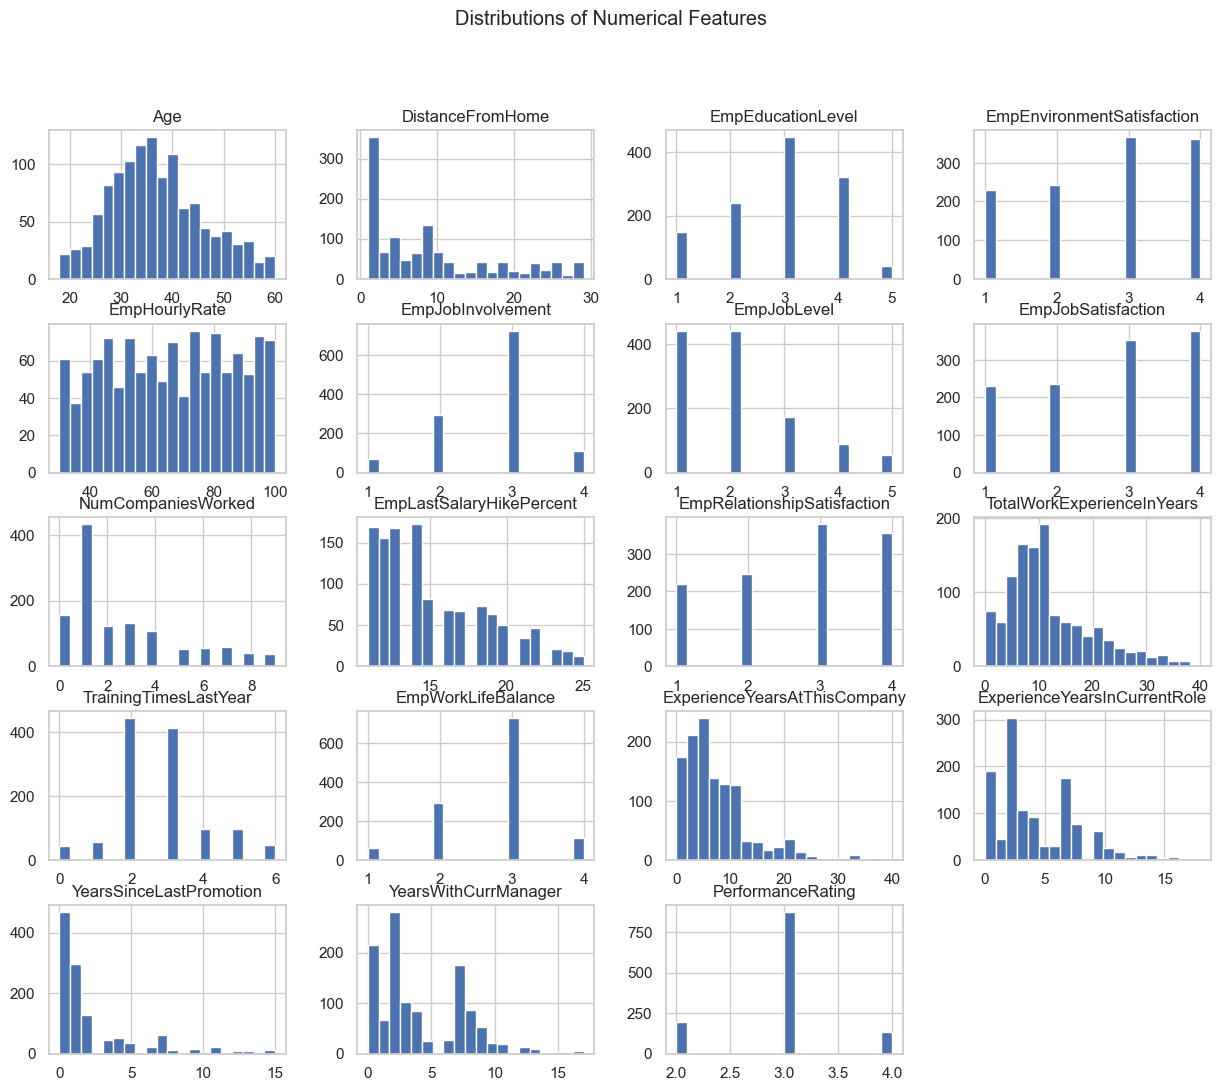

In [30]:
# EDA 5 -  Histograms of Numerical Columns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(bins=20, figsize=(15, 12))
plt.suptitle('Distributions of Numerical Features')
plt.show()

# EDA 5: Distribution of Numerical Features

- **Age** shows a near-normal distribution centered around 35–40.  
- **Hourly Rate** appears uniformly distributed — suggesting structured pay bands.  
- **Satisfaction metrics** cluster between 2–4, implying moderate-to-high satisfaction.  
- **YearsSinceLastPromotion** is right-skewed — promotions are infrequent for most.

**Interpretation:**  
Overall, a mid-career, moderately satisfied workforce with stable employment patterns.


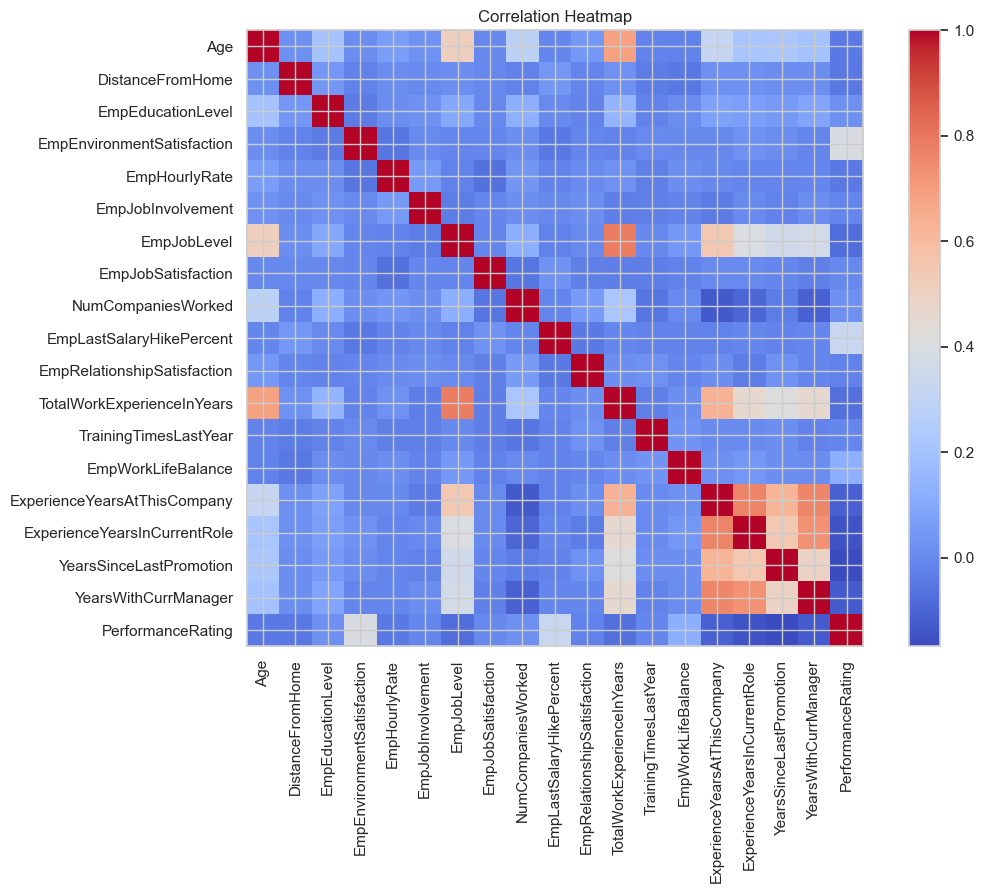

In [ ]:
# EDA 6 - Correlation Matrix for Numerical Features
import numpy as np

corr = df[numeric_cols].corr()
plt.figure(figsize=(12, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Heatmap')
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.show()


# EDA 6: Correlation Heatmap

- Strong positive correlations among experience-related variables (`TotalWorkExperienceInYears`, `ExperienceYearsAtThisCompany`, etc.).  
- Weak correlation between **PerformanceRating** and most features — performance appears multifactorial.  
- Moderate correlation between **YearsSinceLastPromotion** and **ExperienceYearsAtThisCompany**.

**Interpretation:**  
Experience metrics overlap heavily — later modeling should address redundancy through feature selection.


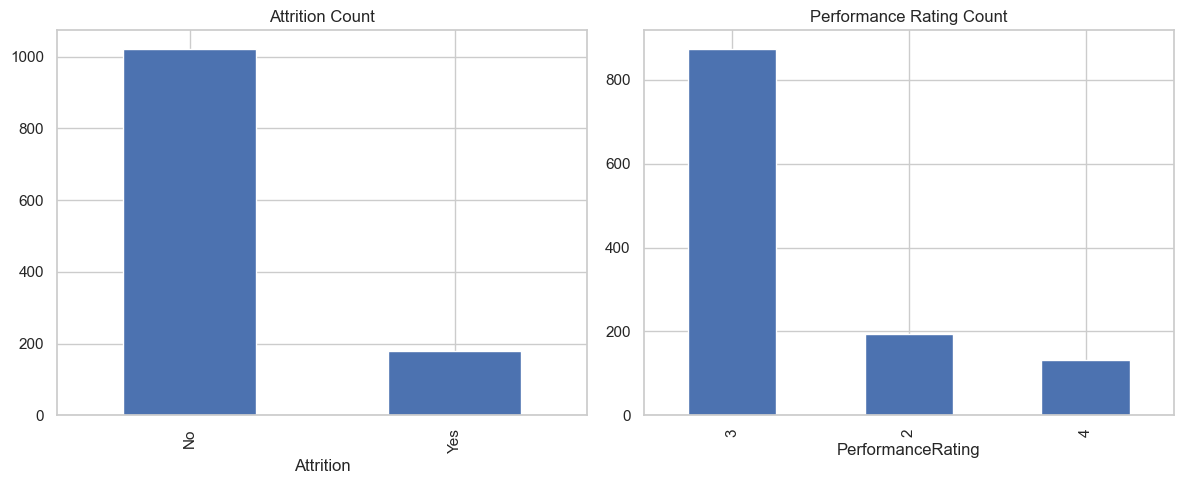

In [ ]:
# EDA 7 -  Attrition and Performance Distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
df['Attrition'].value_counts().plot(kind='bar', ax=axes[0], title='Attrition Count')
df['PerformanceRating'].value_counts().plot(kind='bar', ax=axes[1], title='Performance Rating Count')
plt.tight_layout()
plt.show()


# EDA 7: Target Variable Exploration

- **Attrition:** Highly imbalanced — most employees stayed.  
- **PerformanceRating:** Concentrated around 3, with fewer 4s and rare 2s.

**Interpretation:**  
Both targets are skewed toward positive outcomes, typical in HR evaluations.


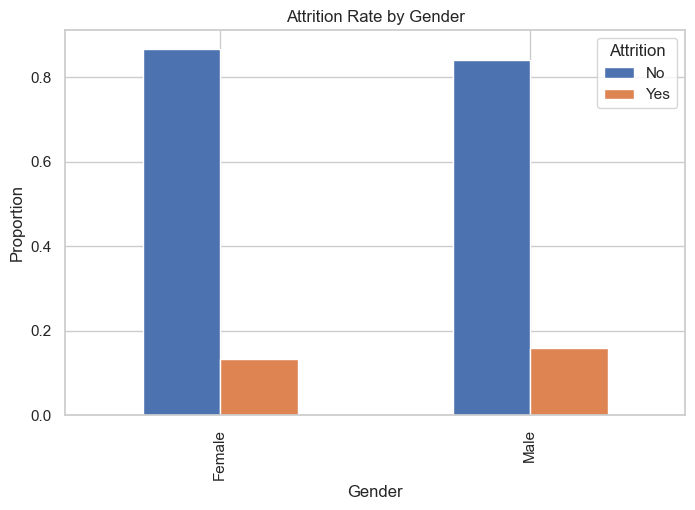

In [31]:
# EDA 8 - Categorical Feature Analysis. Example: Gender vs Attrition
pd.crosstab(df['Gender'], df['Attrition'], normalize='index').plot(kind='bar', figsize=(8, 5))
plt.title('Attrition Rate by Gender')
plt.ylabel('Proportion')
plt.show()


# EDA 8: Gender vs Attrition

Attrition rates are nearly identical between male and female employees.

**Interpretation:**  
Gender does not significantly influence turnover in this dataset. Other factors likely play stronger roles.


<Figure size 800x600 with 0 Axes>

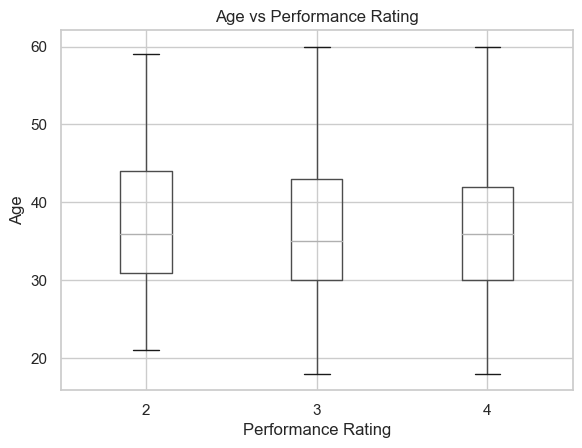

In [24]:
# EDA. Age vs Performance Rating
plt.figure(figsize=(8, 6))
df.boxplot(column='Age', by='PerformanceRating')
plt.title('Age vs Performance Rating')
plt.suptitle('')
plt.xlabel('Performance Rating')
plt.ylabel('Age')
plt.show()


# EDA 9: Age vs Performance Rating

Higher-rated employees tend to be **slightly older**, but with considerable overlap.

**Interpretation:**  
Experience contributes modestly to performance but isn’t the dominant driver. Qualitative factors (like motivation or leadership) probably play a larger role.


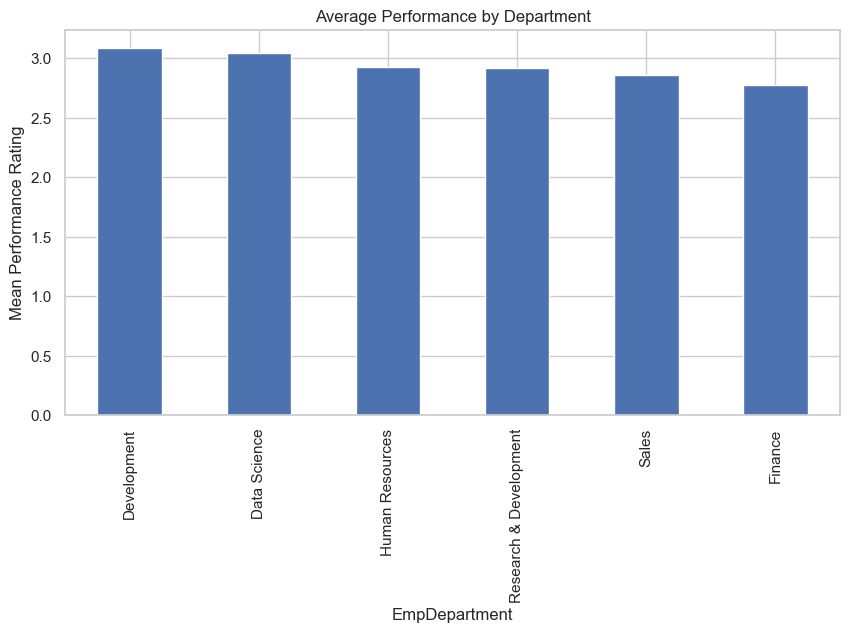

In [25]:
# EDA. Average Performance by Department
dept_summary = df.groupby('EmpDepartment')['PerformanceRating'].mean().sort_values(ascending=False)
dept_summary.plot(kind='bar', figsize=(10, 5))
plt.title('Average Performance by Department')
plt.ylabel('Mean Performance Rating')
plt.show()


# EDA 10: Department-Level Performance

Departments differ slightly in average performance ratings.  
Research-oriented or HR departments may show higher averages, while Sales and Support are more average.

**Interpretation:**  
Organizational culture and departmental practices likely shape performance outcomes more than individual demographics.


# Final Summary

**Overall Insights:**
- The dataset is **clean, consistent, and structured** — no missing data.  
- **Attrition** is rare, while **Performance Ratings** cluster around “3.”  
- **Experience-related features** are strongly correlated and may need feature selection.  
- **Departmental variation** in performance is more pronounced than demographic effects.

**Next Steps:**
1. Encode categorical variables (e.g., One-Hot or Label Encoding).  
2. Address class imbalance in Attrition prediction.  
3. Develop predictive models to identify key performance and attrition drivers.


# Model Training and Selection 

In [9]:
# === 3. Identify target and ID columns ===
target_candidates = [c for c in df.columns if 'performance' in c.lower() or 'rating' in c.lower()]
if len(target_candidates) == 0:
    raise ValueError("No PerformanceRating-like column found.")
target = target_candidates[0]
print("Target:", target)
# Drop identifier columns if present
drop_ids = [c for c in df.columns if c.lower() in ('empnumber','employeeid','employee_number','emp number')]
drop_cols = [target] + drop_ids
X = df.drop(columns=drop_cols).copy()
y = df[target].astype(int).values

Target: PerformanceRating


In [10]:
# === 4. Column types ===
num_features = [c for c in X.columns if pd.api.types.is_numeric_dtype(X[c])]
cat_features = [c for c in X.columns if c not in num_features]
print("Numeric features:", len(num_features))
print("Categorical features:", len(cat_features))


Numeric features: 18
Categorical features: 8


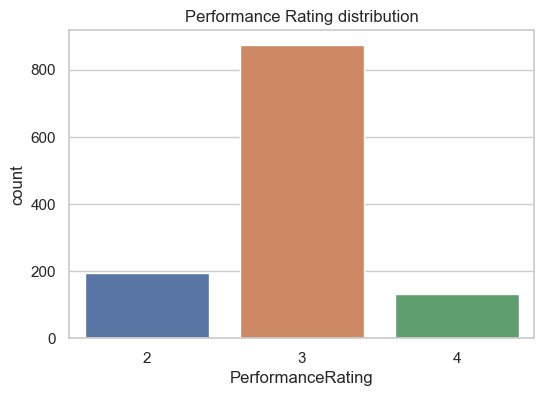

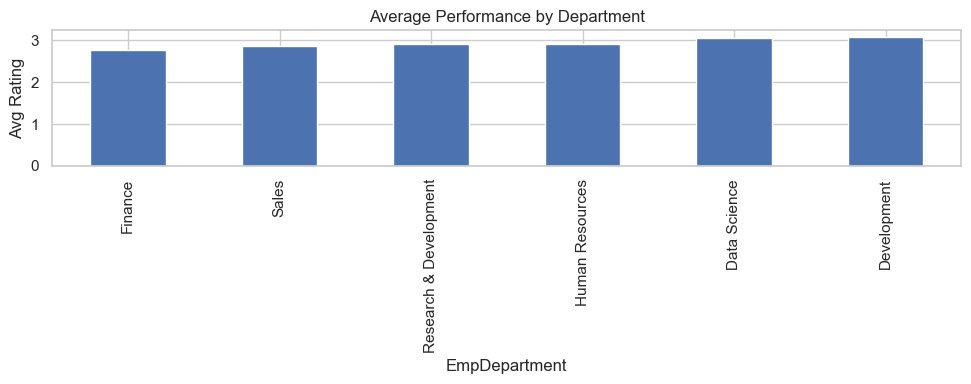

In [11]:
# === 5. Impute (robust) and basic EDA plots ===
# (Data had no missing values per earlier check; imputation kept for pipeline robustness)
X[num_features] = SimpleImputer(strategy='median').fit_transform(X[num_features])
X[cat_features] = SimpleImputer(strategy='most_frequent').fit_transform(X[cat_features])

# Distribution of target
plt.figure(figsize=(6,4)); sns.countplot(x=df[target]); plt.title('Performance Rating distribution'); plt.savefig(os.path.join(out_dir,'target_distribution.png')); plt.show()

# Department-wise average performance if a department column exists
dept_col = None
for c in df.columns:
    if 'department' in c.lower():
        dept_col = c; break
if dept_col:
    dept_mean = df.groupby(dept_col)[target].mean().sort_values()
    plt.figure(figsize=(10,4)); dept_mean.plot(kind='bar'); plt.title('Average Performance by Department'); plt.ylabel('Avg Rating'); plt.tight_layout(); plt.savefig(os.path.join(out_dir,'dept_avg_performance.png')); plt.show()
    dept_mean.to_csv(os.path.join(out_dir,'department_avg_performance.csv'))

In [12]:
# === 6. Feature association (mutual information + simple correlation on encoded values) ===
X_enc = X.copy()
for c in cat_features:
    X_enc[c] = LabelEncoder().fit_transform(X_enc[c].astype(str))
mi = mutual_info_classif(X_enc.fillna(0), y, discrete_features='auto', random_state=RANDOM_STATE)
mi_series = pd.Series(mi, index=X_enc.columns).sort_values(ascending=False)
print("Top mutual info features:")
display(mi_series.head(15))
mi_series.head(15).to_csv(os.path.join(out_dir,'mi_top15.csv'))

corr_with_target = X_enc.corrwith(pd.Series(y)).sort_values(key=lambda s: s.abs(), ascending=False)
display(corr_with_target.head(15))
corr_with_target.head(20).to_csv(os.path.join(out_dir,'corr_with_target_top20.csv'))

Top mutual info features:


EmpLastSalaryHikePercent        0.161783
EmpEnvironmentSatisfaction      0.154576
YearsSinceLastPromotion         0.090766
ExperienceYearsInCurrentRole    0.055622
EmpJobRole                      0.045150
ExperienceYearsAtThisCompany    0.037455
EmpHourlyRate                   0.033922
YearsWithCurrManager            0.030301
EmpDepartment                   0.024415
MaritalStatus                   0.020145
EmpJobSatisfaction              0.019102
Gender                          0.015226
OverTime                        0.011356
EmpEducationLevel               0.009183
EmpJobInvolvement               0.008164
dtype: float64

EmpEnvironmentSatisfaction      0.395561
EmpLastSalaryHikePercent        0.333722
YearsSinceLastPromotion        -0.167629
EmpDepartment                  -0.162615
ExperienceYearsInCurrentRole   -0.147638
EmpWorkLifeBalance              0.124429
YearsWithCurrManager           -0.122313
ExperienceYearsAtThisCompany   -0.111645
EmpJobRole                     -0.096209
EmpJobLevel                    -0.076632
TotalWorkExperienceInYears     -0.068141
OverTime                        0.050206
DistanceFromHome               -0.046142
EmpHourlyRate                  -0.043116
Age                            -0.040164
dtype: float64

In [13]:
# === 7. Preprocessing pipeline ===
numeric_transformer = Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
categorical_transformer = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer([('num', numeric_transformer, num_features), ('cat', categorical_transformer, cat_features)])

In [14]:
# === 8. Train/test split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)
print("Train/Test:", X_train.shape, X_test.shape)

Train/Test: (960, 26) (240, 26)



Training: LogisticRegression
LogisticRegression {'accuracy': 0.825, 'precision': 0.7709677419354839, 'recall': 0.6779975579975579, 'f1': 0.7157063129665869, 'roc_auc': 0.9093847321084034}
Classification report:
               precision    recall  f1-score   support

           2       0.61      0.49      0.54        39
           3       0.86      0.93      0.89       175
           4       0.84      0.62      0.71        26

    accuracy                           0.82       240
   macro avg       0.77      0.68      0.72       240
weighted avg       0.82      0.82      0.82       240



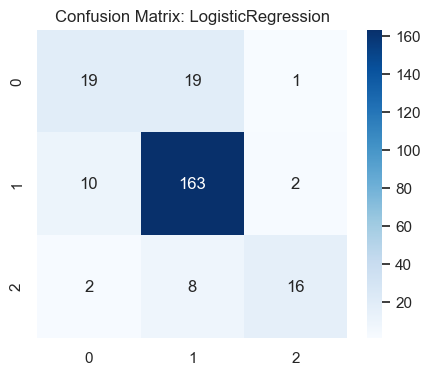


Training: RandomForest
RandomForest {'accuracy': 0.8916666666666667, 'precision': 0.9303807303807304, 'recall': 0.7378754578754579, 'f1': 0.7982140034771614, 'roc_auc': 0.9513237508553453}
Classification report:
               precision    recall  f1-score   support

           2       0.91      0.77      0.83        39
           3       0.88      0.98      0.93       175
           4       1.00      0.46      0.63        26

    accuracy                           0.89       240
   macro avg       0.93      0.74      0.80       240
weighted avg       0.90      0.89      0.88       240



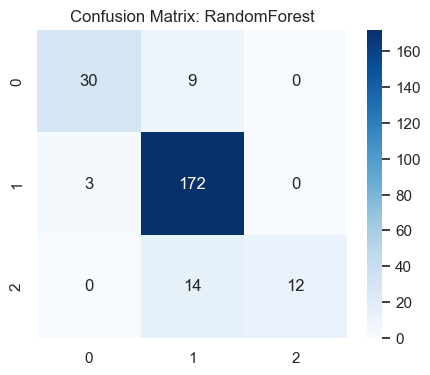


Training: GradientBoosting
GradientBoosting {'accuracy': 0.9291666666666667, 'precision': 0.9134031067732725, 'recall': 0.8622710622710623, 'f1': 0.8856035219133979, 'roc_auc': 0.9832728097783195}
Classification report:
               precision    recall  f1-score   support

           2       0.89      0.85      0.87        39
           3       0.94      0.97      0.96       175
           4       0.91      0.77      0.83        26

    accuracy                           0.93       240
   macro avg       0.91      0.86      0.89       240
weighted avg       0.93      0.93      0.93       240



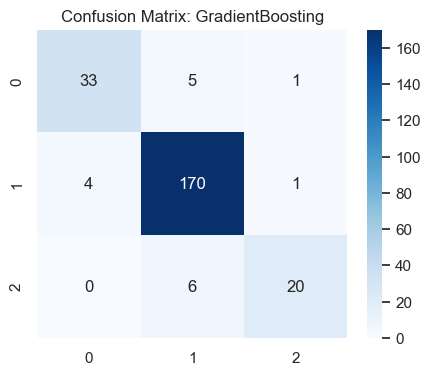

In [15]:
# === 9. Models to train ===
models = {
    'LogisticRegression': Pipeline([('pre', preprocessor), ('clf', LogisticRegression(max_iter=1000))]),
    'RandomForest': Pipeline([('pre', preprocessor), ('clf', RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE))]),
    'GradientBoosting': Pipeline([('pre', preprocessor), ('clf', GradientBoostingClassifier(random_state=RANDOM_STATE))])
}

results = {}
for name, pipe in models.items():
    print("\nTraining:", name)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    try:
        probs = pipe.predict_proba(X_test)
        if probs.shape[1] == 2:
            roc = roc_auc_score(y_test, probs[:,1])
        else:
            roc = roc_auc_score(y_test, probs, multi_class='ovr', average='macro')
    except Exception:
        roc = None
    results[name] = {'accuracy':acc, 'precision':prec, 'recall':rec, 'f1':f1, 'roc_auc':roc}
    print(name, results[name])
    print("Classification report:\n", classification_report(y_test, y_pred, zero_division=0))
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4)); sns.heatmap(cm, annot=True, fmt='d', cmap='Blues'); plt.title(f'Confusion Matrix: {name}'); plt.savefig(os.path.join(out_dir,f'cm_{name}.png')); plt.show()

In [16]:
# === 10. Choose best model by macro F1 and save ===

# Convert results dictionary to DataFrame
results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})
results_df = results_df[['Model', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']]

# Round metrics for readability
results_df[['accuracy', 'precision', 'recall', 'f1', 'roc_auc']] = results_df[
    ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
].applymap(lambda x: round(x, 4) if pd.notnull(x) else None)

# Identify the best model by F1
best_model_name = results_df.loc[results_df['f1'].idxmax(), 'Model']
best_row = results_df.loc[results_df['Model'] == best_model_name]

# Display results as a nice table
print(" Model Performance Comparison:")
display(results_df.style.highlight_max(subset=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], color='blue'))

# Print the best model
print(f" Best model by Macro F1: {best_model_name}")
display(best_row)

# Save the best model
joblib.dump(models[best_model_name], os.path.join(out_dir, f'best_model_{best_model_name}.pkl'))
print(f"Saved best model to: best_model_{best_model_name}.pkl")


 Model Performance Comparison:


,Model,accuracy,precision,recall,f1,roc_auc
0,LogisticRegression,0.825000,0.771000,0.678000,0.715700,0.909400
1,RandomForest,0.891700,0.930400,0.737900,0.798200,0.951300
2,GradientBoosting,0.929200,0.913400,0.862300,0.885600,0.983300


 Best model by Macro F1: GradientBoosting


,Model,accuracy,precision,recall,f1,roc_auc
2,GradientBoosting,0.9292,0.9134,0.8623,0.8856,0.9833


Saved best model to: best_model_GradientBoosting.pkl


EmpLastSalaryHikePercent        0.164944
EmpEnvironmentSatisfaction      0.153163
YearsSinceLastPromotion         0.079968
EmpHourlyRate                   0.041224
ExperienceYearsInCurrentRole    0.037724
Age                             0.037130
ExperienceYearsAtThisCompany    0.032978
YearsWithCurrManager            0.032102
DistanceFromHome                0.031520
TotalWorkExperienceInYears      0.030287
NumCompaniesWorked              0.023280
TrainingTimesLastYear           0.021988
EmpWorkLifeBalance              0.021377
EmpDepartment_Development       0.021271
EmpJobSatisfaction              0.019236
EmpRelationshipSatisfaction     0.018634
EmpEducationLevel               0.018438
EmpJobRole_Developer            0.015913
EmpJobInvolvement               0.015461
EmpJobLevel                     0.014469
dtype: float64

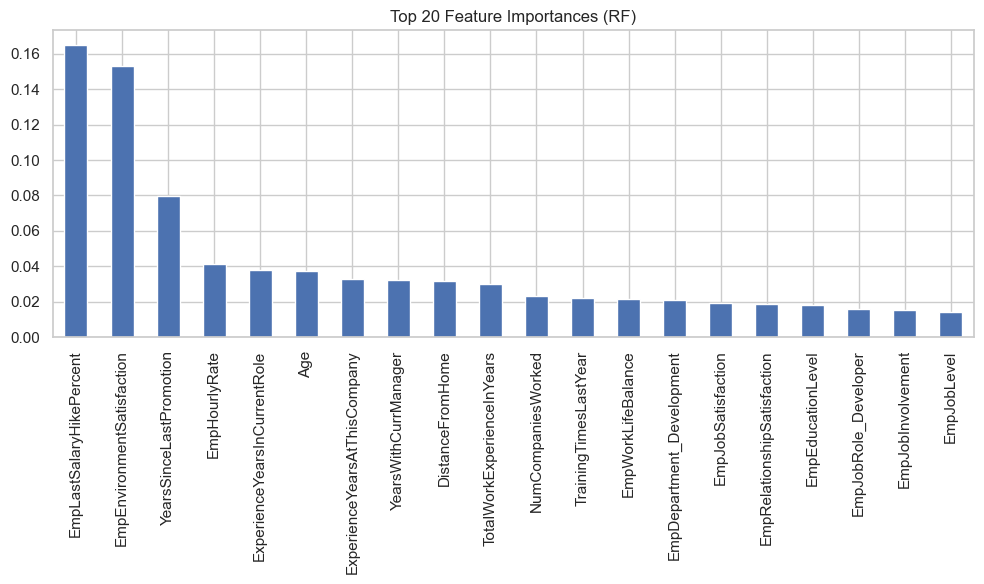

In [17]:
# === 11. Feature importance (Random Forest) ===
if 'RandomForest' in models:
    rf_pipe = models['RandomForest']
    # derive feature names: numeric + onehot categories
    feature_names = list(num_features)
    try:
        ohe = rf_pipe.named_steps['pre'].named_transformers_['cat'].named_steps['onehot']
        cat_names = list(ohe.get_feature_names_out(cat_features))
    except Exception:
        cat_names = []
        for c in cat_features:
            cats = sorted(df[c].astype(str).unique())
            cat_names += [f"{c}__{v}" for v in cats]
    feature_names += cat_names
    importances = rf_pipe.named_steps['clf'].feature_importances_
    feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(30)
    display(feat_imp.head(20))
    feat_imp.to_csv(os.path.join(out_dir,'feature_importances.csv'))
    plt.figure(figsize=(10,6)); feat_imp.head(20).plot(kind='bar'); plt.title('Top 20 Feature Importances (RF)'); plt.tight_layout(); plt.savefig(os.path.join(out_dir,'feature_importances.png')); plt.show()


In [18]:
 #=== 12. Save predictions for test set ===
best_pipe = models[best_model_name]
y_pred_best = best_pipe.predict(X_test)
preds_df = X_test.reset_index(drop=True).copy()
preds_df['y_true'] = y_test
preds_df['y_pred'] = y_pred_best
preds_df.to_csv(os.path.join(out_dir,'test_set_predictions.csv'), index=False)


In [19]:
# === 13. Save summary metadata ===
summary = {
    'best_model': best_model_name,
    'metrics': results,
    'top_mi': mi_series.head(10).to_dict(),
    'corr_with_target_top10': corr_with_target.head(10).to_dict()
}
with open(os.path.join(out_dir,'project_summary.json'),'w') as f:
    json.dump(summary, f, indent=2)

print("\nDone. Outputs saved in folder:", out_dir)
print("Files:", os.listdir(out_dir))


Done. Outputs saved in folder: inx_outputs
Files: ['best_model_GradientBoosting.pkl', 'cm_GradientBoosting.png', 'cm_LogisticRegression.png', 'cm_RandomForest.png', 'corr_with_target_top20.csv', 'department_avg_performance.csv', 'dept_avg_performance.png', 'feature_importances.csv', 'feature_importances.png', 'mi_top15.csv', 'project_summary.json', 'target_distribution.png', 'test_set_predictions.csv']
